# GCC218 - Algoritmos em Grafos
  **Prof. Mayron César de Oliveira Moreira** <br>
  *Departamento de Ciência da Computação <br>
  Universidade Federal de Lavras* <br>

# Estruturas de dados

A representação de um grafo através de diagramas é intuitiva e conveniente quando se trata de poucos vértices e/ou arestas. Ao modelar problemas através de grafos complexos, utilizamos estruturas de dados, a fim de aplicar algoritmos que resolvam o problema computacionalmente de forma eficiente. A seguir, apresentamos as estruturas mais utilizadas para grafos: ($i$) listas de adjacência; ($ii$) matrizes de adjacência; e ($iii$) matrizes de incidência. Para tanto, seja um grafo $G=(V,E)$, $|V|=n$ e $|E|=m$. 

## Lista de adjacências

Definimos a lista de adjacências de $G$ como um vetor de dimensão $n$, correpondendo a cada elemento de $V$. Cada posição $v \in V$, por sua vez, possui uma lista encadeada de nós, compostos por um identificador de vértice e um ponteiro para o próximo vértice da lista, constituindo todos os vizinhos do vértice $v$.
A Figura 1 ilustra um exemplo de lista de adjacência, para um grafo não-direcionado.

![Figura 1: Fonte - Goldbarg & Goldbarg (2012)](img/listaadj.png)

### Classe Vértice

Representa o nó da lista de adjacência

In [3]:
import networkx as nx # Biblioteca utilizada para a impressão do grafo
import matplotlib.pyplot as plt

'''
Classe que representa um nó do grafo, guardando o próximo nó que 
ele aponta
'''
class Vertice(object):
    # Construtor da classe (Membros privados)
    def __init__(self, nome, peso = 1):
        self.__nome = str(nome)
        self.__peso = peso
        self.__proximo = None

    # Destrutor da classe
    def __del__(self): 
        aux = self
        tmp = self.__proximo
        if(aux.__proximo != None):
            del tmp
        del aux
        
    # Personaliza a impressao do vértice
    def __str__(self):
        return " {" + str(self.__nome) + ", " + str(self.__peso) + "} "

    # Cria o próximo vértice a ser inserido na lista
    def _criaProximo(self, v):      
        if(v != None):
            # Alocando um novo vértice
            self.__proximo = Vertice(v._obtemNome(), v._obtemPeso())
            return
        self.proximo = v
                
    # Modifica o próximo vértice em sua lista
    def _modificaProximo(self, v):
        self.__proximo = v
        
    # Retorna o nome do vértice
    def _obtemNome(self):
        return self.__nome
    
    # Retorna o peso do vértice
    def _obtemPeso(self):
        return self.__peso
    
    # Obtem o próximo vértice a lista
    def _obtemProximo(self):
        return self.__proximo

### Classe Aresta

In [4]:
class Aresta (object):
    # Construtor da classe (Membros privados)
    def __init__(self, u, v, peso = 1):
        self.__u = str(u)
        self.__v = str(v)
        self.__peso = peso
        
    # Personaliza a impressao da aresta
    def __str__(self):
        return " (" + str(self.__u) + ", " + str(self.__v) + ")(" + str(self.__peso) + ") "
    
    # Obtem vertices da aresta (retorna uma lista com dois elementos)
    def _obtemAresta(self):
        return [self.__u, self.__v]
    
    # Retorna o peso da aresta
    def _obtemPeso(self):
        return self.__peso

### Classe Lista de Adjacência

In [5]:
# Classe Grafo - Matriz de Adjacências
class ListaAdj(object):
    # Construtor da classe
    def __init__(self):
        # Lista de adjacencia de vertices (Membro privado da classe)
        self.__lista = [] 
        # Numero de vertices (Membro privado da classe)
        self.__nVertices = 0 
        '''
        Dicionario que contem o nome do vertice como chave e 
        como valor, sua posicao na lista
        '''
        self.__posicoes = {} 

    # Destrutor da classe
    def __del__(self):  
        for v in self.__lista:
            del v 

    # Impressão da lista
    def __str__(self):
        saida = "V = { "
        for v in self.__lista:
            saida += v._obtemNome() + " "
        saida += "}\n"

        # Impressão da lista de arestas
        saida += "Vizinhança dos vértices \n"
        for v in self.__lista:
            saida += v._obtemNome() + ": "
            aux = v._obtemProximo()
            while(aux._obtemProximo() != None):
                saida += aux._obtemNome() + "(" + str(aux._obtemPeso()) + ") "
                aux = aux._obtemProximo()
            saida += aux._obtemNome() + "(" + str(aux._obtemPeso()) + ") "
            saida += "\n"
            saida += "\n"
        return saida    
  
    # Dada uma posição na lista, retorna o vértice correspondente
    def _obtemVertice(self, pos):
        return self.__lista[pos]
        
    # Dado um vértice, retorna sua posição relativa na lista
    def _obtemPosicao(self, v):
        try:
            return self.__posicoes[str(v)]
        except:
            return -1

    # Retorna a lista de vizinhos do vertice u
    def _obtemVizinhos(self, u):
        lista = [] # Lista dos nomes dos vértices

        # Obtendo a posicao do vertice u
        pos = self._obtemPosicao(u)

        # Já partindo do próximo vértice que u aponta
        aux = self.__lista[pos]._obtemProximo()

        # Enquanto pudermos avançar na lista
        while(aux != None):
            tmp = self._obtemPosicao(aux._obtemNome())
            lista.append(self.__lista[tmp]._obtemNome())
            aux = aux._obtemProximo()
        return lista
 
    # Retorna True se os vertices u e v sao vizinhos
    def _ehVizinho(self, u, v):
        vertice_u = str(u)
        vertice_v = str(v)

        # Busca o vértice de nome 'u'
        pos_u = self._obtemPosicao(vertice_u)
        aux = self.__lista[pos_u]
        while(aux != None): # Buscamos na lista do vértice 'u'
            # Se encontramos 'v' nesta lista
            if(aux._obtemNome() == vertice_v): 
                return True # Conclusão: 'u' e 'v' são vizinhos
            aux = aux._obtemProximo() # Senão, vamos para o próximo da lista
        '''
        Por fim, caso não encontremos 'v' na lista de 'u', 
        retornamos False
        '''
        return False 
  
    # Remove o vértice u do grafo
    def _removeVertice(self, u):
        print("Exercício")
    
    # Remove a aresta (u,v) do grafo
    def _removeAresta(self, u, v):
        print("Exercício")
        
    # Esta funcao retorna a lista de arestas do grafo
    def _obtemArestas(self):
        # Lista de arestas
        listaArestas = []
        
        # Percorrendo as posicoes da lista de vertices
        for pos_u in self.__posicoes.values():
            u = self.__lista[pos_u]
            v = self.__lista[pos_u]._obtemProximo()
            # Enquanto pudermos avançar na lista
            while(v != None):
                aresta = Aresta(u._obtemNome(), v._obtemNome(), v._obtemPeso())
                listaArestas.append(aresta)
                v = v._obtemProximo()
                
        return listaArestas
      
    '''
    Nesta função, adicionamos um novo elemento ao grafo, que pode ser:
    (a) Um único vértice
    (b) Uma aresta (ou arco), valorada ao não
    '''
    def _adiciona(self, u, v = None, peso = 1, ehDirecionado = False):
        if(u == None):
            return # Nem  vértice de origem é válido
        
        vertice_u = str(u)
    
        # Se v for None, então verificamos a inserção de um vértice
        if(v == None):
            # Se u não foi inserido, vamos inserí-lo
            if(not (u in self.__lista)):
                self.__criaVertice(u)
                self.__nVertices += 1

        else:
            vertice_v = str(v)
            pos_u = self._obtemPosicao(u)
            pos_v = self._obtemPosicao(v)

            # Se u e v não são vizinhos, cria a ligação entre eles
            if(pos_u >= 0 and pos_v >= 0 and not(self._ehVizinho(u, v))):
                self.__criaAresta(u, v, peso)

                if(not ehDirecionado):
                    self.__criaAresta(v, u, peso)
    
    '''
    Cria uma aresta de ligação entre os vértices u e v, dado um 
    peso (1, por default)
    '''
    def __criaAresta(self, u, v, peso = 1):
        pos1 = self._obtemPosicao(u)
        pos2 = self._obtemPosicao(v)
        
        if(pos1 >= 0 and pos2 >= 0):
            aux = self.__lista[pos1] # Vértice auxiliar
            # Encontra o próximo elemento do vetor
            while(aux != None and aux._obtemProximo() != None):                
                aux = aux._obtemProximo()
            # Cria um nó na lista de u contendo o vértice v
            aux._criaProximo(Vertice(self.__lista[pos2]._obtemNome(), peso))    

            # Modifica o último para apontar para nulo
            prox = aux._obtemProximo()
            prox._modificaProximo(None)

    # Criacao de um vertice para a lista
    def __criaVertice(self, u):
        '''
        Testa se o vértice u eh novo (ou seja: nao foi encontrado 
        no grafo)
        '''
        if(self._obtemPosicao(u) == -1):
            vertice = Vertice(u)
            self.__lista.append(vertice)
            self.__posicoes[str(u)] = self.__lista.index(vertice)

## Matriz de adjacências

A matriz de adjacências de $G$ consiste em uma matriz quadrada $M=[m_{uv}]$ de ordem $n$, em que cada linha e cada coluna de $M$ corresponde a um vértice de $V$. Os elementos de $M$ são definidos da seguinte forma:

\begin{cases}
  m_{uv} = 1, & (u,v) \in E \\
  m_{uv} = 0, & \mbox{caso contrário.}
\end{cases}

Caso o grafo seja valorado, podemos representar a ligação dos vértices $u,v$ pelo seu respectivo peso, na posição $m_{uv}$. As Figuras 2 e 3 ilustram exemplos de matrizes de adjacência, para um grafo não-direcionado e um grafo direcionado, respectivamente.

![Figura 2: Fonte - Goldbarg & Goldbarg (2012).](img/Matriz_Adj_1.png)

![Figura 3: Fonte - Goldbarg & Goldbarg (2012).](img/Matriz_Adj_2.png)

### Classe Matriz de Adjacência

In [6]:
class MatrizAdj(object): 
    # Construtor da classe
    def __init__(self):
        self.__M = [] # Cria, inicialmente, uma matriz sem elementos
        # Numero de vertices (Membro privado da classe)
        self.__nVertices = 0 
        '''
        Dicionario que contem o nome do vertice como chave e como 
        valor, sua posicao na lista
        '''
        self.__posicoes = {} 
        '''
        Dicionario que contem a posicao do vertice na matriz como 
        chave e como valor, o nome do vertice
        '''
        self.__vertices = {}
    
    # Destrutor da classe
    def __del__(self):  
        del self.__M

    # Impressão da matriz de adjacência
    def __str__(self):
        saida = "V = { "
        for v in self.__posicoes:
            saida += v + " "
        saida += "}\n"

        saida += "Matriz de adjacência\n"
        for i in range(self.__nVertices):
            for j in range(self.__nVertices):
                saida += str(self.__M[i][j]) + " "
            saida += "\n"
        saida += "\n"
        return saida

    '''
    Dada uma posição da matriz, retorna um vertice (neste caso, 
    optei pelo nome)
    '''
    def _obtemVertice(self, pos):
        return self.__vertices[pos]

    # Dado um vértice, retorna sua posição relativa na matriz
    def _obtemPosicao(self, u):
        try:
            return self.__posicoes[str(u)]
        except:
            return -1

    '''
    Retorna os vizinhos do vertice u (retorna sua posicao 
    relativa na matriz)
    '''
    def _obtemVizinhos(self, u):
        lista = []
        pos_u = self._obtemPosicao(str(u))
        for i in range(self.__nVertices):
            if(self.__M[pos_u][i] != 0 and self.__M[pos_u][i] != INF):
                lista.append(self.__vertices[i])
        return lista

    # Verifica se o vertice u eh vizinho de v
    def _ehVizinho(self, u, v):
        # Obtenção da posição relativa do vértice u
        pos_u = self._obtemPosicao(u) 
        # Obtenção da posição relativa do vértice v
        pos_v = self._obtemPosicao(v) 

        if(pos_u >= 0 and pos_v >= 0):
            return (self.__M[pos_u][pos_v] != 0 and 
                    self.__M[pos_u][pos_v] != INF)

        # Caso pos_u == -1 ou pos_v == -1
        return False

    # Remove o vertice u do grafo
    def _removeVertice(self, u):
        print("Exercicio")

    # Remove a aresta (u,v) do grafo
    def _removeAresta(self, e, u, v):
        print("Exercicio")
        
    # Esta funcao retorna a lista de arestas do grafo
    def _obtemArestas(self):
        listaArestas = []
        for pos_u in range(self.__nVertices):
            u = self.__vertices[pos_u]
            for pos_v in range(self.__nVertices):
                v = self.__vertices[pos_v]
                if(self.__M[pos_u][pos_v] != 0 and self.__M[pos_u][pos_v] != INF):
                    aresta = Aresta(u, v, self.__M[pos_u][pos_v])
                    listaArestas.append(aresta)
        
        return listaArestas
      
    '''
    Nesta função, adicionamos um novo elemento ao grafo, que pode ser:
    (a) Um único vértice
    (b) Uma aresta (ou arco), valorada ao não
    '''
    def _adiciona(self, u, v = None, peso = 1, direcionado = True):
        if(u == None):
            return

        vertice_u = str(u)
        # Se v for None, então verificamos a inserção de um vértice
        if(v == None):
            # Se u não foi inserido, vamos inserí-lo
            if(not (vertice_u in self.__posicoes)):
                self.__criaVertice(u)

        else:
            vertice_v = str(v)
            # Se u e v não são vizinhos, cria a ligação entre eles
            if(not(self._ehVizinho(u, v))):
                self.__criaAresta(u, v, peso)

                if(not direcionado):
                    self.__criaAresta(v, u, peso)
    
    '''
    Cria uma aresta de ligação entre os vértices u e v, 
    dado um peso (1, por default)
    '''
    def __criaAresta(self, u, v, peso = 1):
        # Obtenção da posição relativa do vértice u
        pos_u = self._obtemPosicao(u) 
        # Obtenção da posição relativa do vértice v
        pos_v = self._obtemPosicao(v) 
        # Ligação dos vértices u e v
        if(pos_u >= 0 and pos_v >= 0):
            self.__M[pos_u][pos_v] = peso
    
    # Criacao de um vertice para a matriz
    def __criaVertice(self, u):
        self.__nVertices += 1
        self.__M.append([0])

        self.__posicoes[str(u)] = self.__nVertices - 1
        self.__vertices[self.__nVertices - 1] = str(u)

        # Se tamanho é igual a 1, teremos apenas um vértice isolado
        if(self.__nVertices == 1):
            return

        '''
        Para cada vértice do grafo, adicionamos sua ligação 
        ao novo vértice
        '''
        for i in range(self.__nVertices - 1):        
            self.__M[i].append(0)

        # Criamos as arestas do novo grafo
        for i in range(self.__nVertices - 1):
            self.__M[self.__nVertices - 1].append(0)

## Matriz de incidência



A matriz de incidências de $G$ consiste em uma matriz $M$, de dimensão $m\times n$, em que cada linha corresponde a uma aresta de $E$ e cada coluna corresponde a um vértice de $V$. Os elementos de $M$ são definidos da seguinte forma:

\begin{cases}
  m_{eu} = 1\mbox{ e }m_{ev} = 1, & e=(u,v) \in E \\
  m_{eu} = 0\mbox{ e }m_{ev} = 0, & \mbox{caso contrário.}
\end{cases}

Para grafos direcionados, inserimos a notação de que se $e=(u,v) \in E$,
então $m_{eu} = 1$ e $m_{ev} = -1$ (com o grafo valorado, podemos substituir os valores 1 e -1 pelo respectivo peso da aresta, variando também o sinal). As Figuras 4 e 5 ilustram exemplos de matrizes de adjacência, para um grafo não-direcionado e um grafo direcionado, respectivamente.

![Figura 4: Fonte - Goldbarg & Goldbarg (2012).](img/Matriz_Incidencia_1.png)

![Figura 5: Fonte - Goldbarg & Goldbarg (2012).](img/Matriz_Incidencia_2.png)

### Classe Matriz de Incidência

In [7]:
class MatrizInc(object): 
    # Construtor da classe
    def __init__(self):
        self.__M = [] # Cria, inicialmente, uma matriz sem elementos
        # Numero de vertices (Membro privado da classe)
        self.__nVertices = 0
        # Numero de arestas (Membro privado da classe)
        self.__nArestas = 0 
        '''
        Dicionario que contem o nome do vertice como chave e 
        como valor, sua posicao na lista
        '''
        self.__posicoes = {} 
        '''
        Dicionario que contem a posicao do vertice na matriz como chave 
        e como valor, o nome do vertice
        '''
        self.__vertices = {} 
    
    # Destrutor da classe
    def __del__(self):  
        del self.__M

    # Impressão da matriz de incidencia
    def __str__(self):
        saida = "V = { "
        for v in self.__posicoes:
            saida += v + " "
        saida += "}\n"

        saida += "Matriz de incidência\n"
        for i in range(self.__nArestas):
            for j in range(self.__nVertices):
                saida += str(self.__M[i][j]) + " "
            saida += "\n"
        saida += "\n"
        return saida

    '''
    Dada uma posição da matriz, retorna um vertice (neste caso, 
    optei pelo nome)
    '''
    def _obtemVertice(self, pos):
        return self.__vertices[pos]

    # Dado um vértice, retorna sua posição relativa na matriz
    def _obtemPosicao(self, u):
        try:
            return self.__posicoes[str(u)]
        except:
            return -1

    '''
    Retorna os vizinhos do vertice u (retorna sua posicao relativa 
    na matriz)
    '''
    def _obtemVizinhos(self, u):
        lista = []
        pos_u = self._obtemPosicao(str(u))
        for i in range(self.__nArestas):
            for v in range(self.__nVertices):
                if(pos_u != v and self.__M[i][pos_u] != 0 and 
                   self.__M[i][pos_u] != INF and self.__M[i][v] != 0 
                   and self.__M[i][v] != INF):
                    lista.append(self.__vertices[v])
                    break
        return lista

    # Verifica se o vertice u eh vizinho de v
    def _ehVizinho(self, u, v):
        # Obtenção da posição relativa do vértice u
        pos_u = self._obtemPosicao(u) 
        # Obtenção da posição relativa do vértice v
        pos_v = self._obtemPosicao(v) 

        if(pos_u >= 0 and pos_v >= 0):
            for i in range(self.__nArestas):
                if(self.__M[i][pos_u] != 0 and self.__M[i][pos_u] != INF
                  and self.__M[i][pos_v] != 0 and self.__M[i][pos_v] != INF):
                    return True

        # Caso pos_u == -1 ou pos_v == -1
        return False

    # Remove o vertice u do grafo
    def _removeVertice(self, u):
        print("Exercicio")

    # Remove a aresta (u,v) do grafo
    def _removeAresta(self, e, u, v):
        print("Exercicio")
      
      
    # Esta funcao retorna a lista de arestas do grafo
    def _obtemArestas(self):
        listaArestas = []
        for i in range(self.__nArestas):
            u = v = -1
            for j in range(self.__nVertices):
                if(self.__M[i][j] != 0 
                   and self.__M[i][j] != INF):
                    # Armazenando os pares u,v
                    if(u == -1):
                        u = j
                      
                    else:
                        v = j
            if(u >= 0 and v >= 0):
                if((self.__M[i][u] >= 0 and self.__M[i][v] < 0) or (self.__M[i][u] >= 0 and self.__M[i][v] >= 0)
                  or (self.__M[i][u] < 0 and self.__M[i][v] < 0)):
                    aresta = Aresta(self.__vertices[u], self.__vertices[v], self.__M[i][u])
                
                elif(self.__M[i][u] < 0 and self.__M[i][v] >= 0):
                    aresta = Aresta(self.__vertices[v], self.__vertices[u], self.__M[i][v])
              
            listaArestas.append(aresta)
              
        return listaArestas
      
    '''
    Nesta função, adicionamos um novo elemento ao grafo, que pode ser:
    (a) Um único vértice
    (b) Uma aresta (ou arco), valorada ao não
    '''
    def _adiciona(self, u, v = None, peso = 1, direcionado = True):
        if(u == None):
            return

        vertice_u = str(u)
        # Se v for None, então verificamos a inserção de um vértice
        if(v == None):
            # Se u não foi inserido, vamos inserí-lo
            if(not (vertice_u in self.__posicoes)):
                self.__criaVertice(u)

        else:
            vertice_v = str(v)
            # Se u e v não são vizinhos, cria a ligação entre eles
            if(not(self._ehVizinho(u, v))):
                self.__criaAresta(u, v, peso)
                if(direcionado == True):
                    self.__M[self.__nArestas][self._obtemPosicao(v)] = -1*self.__M[self.qtdAresta][self._obtemPosicao(v)]
                # Aumenta o numero de arestas
                self.__nArestas = self.__nArestas + 1 
    
    '''
    Cria uma aresta de ligação entre os vértices u e v, 
    dado um peso (1, por default)
    '''
    def __criaAresta(self, u, v, peso = 1):
        # Cria a nova aresta
        self.__M.append([])

        # Zerando as colunas da nova aresta
        for i in range(self.__nVertices):            
            self.__M[self.__nArestas].append(0)

        # Obtenção da posição relativa do vértice u
        pos_u = self._obtemPosicao(u) 
        # Obtenção da posição relativa do vértice v
        pos_v = self._obtemPosicao(v) 
        
        # Ligação dos vértices u e v
        if(pos_u >= 0 and pos_v >= 0):
            self.__M[self.__nArestas][pos_u] = peso
            self.__M[self.__nArestas][pos_v] = peso
    
    # Criacao de um vertice para a matriz
    def __criaVertice(self, u):            
        self.__nVertices += 1
        for linhaM in self.__M:
            self.linhaM.append(0)

        self.__posicoes[str(u)] = self.__nVertices - 1
        self.__vertices[self.__nVertices - 1] = str(u)

## Classes utilitárias

### Classe Instância

Representa a estrutura de dados que obtem as informações do grafo.

In [8]:
# Definição do nosso "INFINITO"
INF = 1E8

# Classe que obtem os dados de entrada para a montagem do grafo
class Instancia(object):
    def __init__(self, arquivo = None):
        # Objeto que realiza a leitura dos arquivos de entrada
        self.__arquivo = arquivo 
  
    def _leArquivo(self, nomeArq):
        # Objeto que realiza a leitura dos arquivos de entrada
        self.__arquivo = open(nomeArq, 'r') 

        linhas = self.__arquivo.readlines()
        
        direcionado = True
        # Retirando o '\n' da string
        if(linhas[0].rstrip('\n') == "UNDIRECTED"): 
            direcionado = False
        
        # Estrutura de lista de adjacencia 
        g = ListaAdj()
        
        # Estrutura de matriz de adjacencia
        #g = MatrizAdj()
        
        # Estrutura de matriz de incidencia
        #g = MatrizInc()
        
        nVertices = int(linhas[1])
        
        # Conjunto de labels dos vertices (faço por conveniência)
        setLabels = set([])
        for i in range(2, len(linhas)):
            linha = linhas[i].split()
            setLabels.add(linha[0])
            setLabels.add(linha[1])
        setLabels = set(map(int, setLabels))

        '''
        Adicao dos primeiros vertices no grafo (no momento, o grafo 
        esta vazio)
        '''
        for i in setLabels:
            g._adiciona(str(i))
        
        # Criacao do grafo
        for i in range(2, len(linhas)):
            linha = linhas[i].split()
            if(len(linha) == 2): # Se for nao-valorado
                g._adiciona(linha[0], linha[1], 1, direcionado)
                
            else: # Se for valorado
                g._adiciona(linha[0], linha[1], float(linha[2]), 
                            direcionado)
                
        return g

### Função main

Testa as funcionalidades implementadas.

In [9]:
instancia = Instancia()
grafo = instancia._leArquivo("./instancias/grafo2.txt")
print(grafo)
print(grafo._ehVizinho(1,2)) # True
print(grafo._ehVizinho(1,10)) # False
# Vizinhos do vertice 2
vizinhos = grafo._obtemVizinhos(1)
for v in vizinhos:
    print(v)

arestas = grafo._obtemArestas()
for e in arestas:
    print(e)

V = { 1 2 3 4 5 6 7 8 9 10 }
Vizinhança dos vértices 
1: 2(10.0) 4(3.0) 5(20.0) 

2: 1(10.0) 3(3.0) 5(4.0) 6(5.0) 

3: 2(3.0) 6(7.0) 7(10.0) 8(-1.0) 

4: 1(3.0) 10(3.0) 

5: 1(20.0) 2(4.0) 7(4.0) 9(5.0) 

6: 2(5.0) 3(7.0) 7(19.0) 9(23.0) 

7: 3(10.0) 5(4.0) 6(19.0) 9(33.0) 

8: 3(-1.0) 10(4.0) 

9: 5(5.0) 6(23.0) 7(33.0) 10(2.0) 

10: 4(3.0) 8(4.0) 9(2.0) 


True
False
2
4
5
 (1, 2)(10.0) 
 (1, 4)(3.0) 
 (1, 5)(20.0) 
 (2, 1)(10.0) 
 (2, 3)(3.0) 
 (2, 5)(4.0) 
 (2, 6)(5.0) 
 (3, 2)(3.0) 
 (3, 6)(7.0) 
 (3, 7)(10.0) 
 (3, 8)(-1.0) 
 (4, 1)(3.0) 
 (4, 10)(3.0) 
 (5, 1)(20.0) 
 (5, 2)(4.0) 
 (5, 7)(4.0) 
 (5, 9)(5.0) 
 (6, 2)(5.0) 
 (6, 3)(7.0) 
 (6, 7)(19.0) 
 (6, 9)(23.0) 
 (7, 3)(10.0) 
 (7, 5)(4.0) 
 (7, 6)(19.0) 
 (7, 9)(33.0) 
 (8, 3)(-1.0) 
 (8, 10)(4.0) 
 (9, 5)(5.0) 
 (9, 6)(23.0) 
 (9, 7)(33.0) 
 (9, 10)(2.0) 
 (10, 4)(3.0) 
 (10, 8)(4.0) 
 (10, 9)(2.0) 


### Desenhando o grafo a partir da ferramenta *networkx*

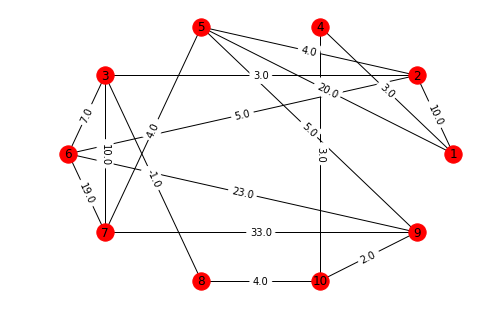

In [10]:
G=nx.Graph() # Utilizando o networkx

# Inserindo as arestas em G
for aresta in arestas:
    e = aresta._obtemAresta()
    p = aresta._obtemPeso()
    G.add_edge(e[0], e[1], weight = p)  

# Obtendo as infos das arestas e vertices a partir de G
edg_labl = nx.get_edge_attributes(G,'weight')

# Modificando o layout
pos=nx.circular_layout(G)

# Desenhando o grafo
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_edge_labels(G, pos, with_labels=True, edge_labels = edg_labl)
plt.savefig("graphLA.png")
plt.show()